In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('/content/Heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for null values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# Checking for balanced dataset

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


# Performing Feature Selection

## Checking Correlation

In [ ]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [ ]:
x=df.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y=df['target']
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


## Univariate Selection For categorical Variable

In [ ]:
bestfeatures = SelectKBest(score_func=chi2)

In [ ]:
fit = bestfeatures.fit(x,y)
scores = pd.DataFrame(fit.scores_)

In [ ]:
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,scores],axis=1)
featureScores.columns = ['Label','Score']

In [ ]:
featureScores.sort_values(by='Score',ascending=False)

,Label,Score
7,thalach,188.320472
9,oldpeak,72.644253
11,ca,66.440765
2,cp,62.598098
8,exang,38.914377
4,chol,23.936394
0,age,23.286624
3,trestbps,14.823925
10,slope,9.804095
1,sex,7.576835


## Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
corr=ExtraTreesClassifier()

In [ ]:
corr.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(corr.feature_importances_)

[0.07145964 0.05783497 0.13066296 0.06260952 0.05859286 0.01965093
 0.03323178 0.08607549 0.10220969 0.08215446 0.07462044 0.1217738
 0.09912344]


In [ ]:
feature_importance=pd.Series(corr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

,0
cp,0.130663
ca,0.121774
exang,0.102210
thal,0.099123
thalach,0.086075
oldpeak,0.082154
slope,0.074620
age,0.071460
trestbps,0.062610
chol,0.058593


<Axes: >

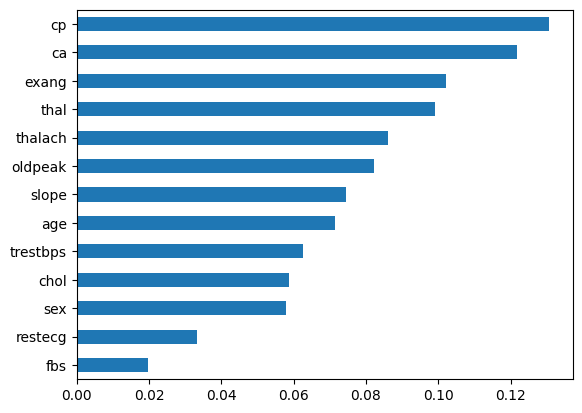

In [ ]:
feature_importance.sort_values(ascending=True).plot(kind='barh')

### Droping the features which are not correlated

In [ ]:
df.drop(['fbs','restecg'],axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 12)

### Feature Engineering

In [ ]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex [1 0]


cp [3 2 1 0]


trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


thala

#### sex,cp,restecg,exang,slope,ca,thal,target are categorical column

In [ ]:
new_sex=pd.get_dummies(data=df['sex'],prefix='sex')
new_sex

,sex_0,sex_1
0,False,True
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
298,True,False
299,False,True
300,False,True
301,False,True


In [ ]:
new_cp=pd.get_dummies(df['cp'],prefix='chestPain')
new_cp

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,False,False,False,True
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,True,False,False,False
...,...,...,...,...
298,True,False,False,False
299,False,False,False,True
300,True,False,False,False
301,True,False,False,False


In [ ]:
new_exang=pd.get_dummies(df['exang'],prefix='exang')
new_exang

,exang_0,exang_1
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
298,False,True
299,True,False
300,True,False
301,False,True


In [ ]:
new_slope=pd.get_dummies(df['slope'],prefix='slope')
new_slope

,slope_0,slope_1,slope_2
0,True,False,False
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
298,False,True,False
299,False,True,False
300,False,True,False
301,False,True,False


In [ ]:
new_thal=pd.get_dummies(df['thal'],prefix='thal')
new_thal

,thal_0,thal_1,thal_2,thal_3
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
298,False,False,False,True
299,False,False,False,True
300,False,False,False,True
301,False,False,False,True


In [ ]:
new_ca=pd.get_dummies(df['ca'],prefix='ca')
new_ca

,ca_0,ca_1,ca_2,ca_3,ca_4
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
298,True,False,False,False,False
299,True,False,False,False,False
300,False,False,True,False,False
301,False,True,False,False,False


In [ ]:
app=[df,new_sex,new_cp,new_ca,new_thal,new_exang,new_slope]


In [ ]:
df1=pd.concat(app,axis=1)

In [ ]:
df1.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,1,3,145,233,150,0,2.3,0,0,...,False,False,True,False,False,True,False,True,False,False
1,37,1,2,130,250,187,0,3.5,0,0,...,False,False,False,True,False,True,False,True,False,False
2,41,0,1,130,204,172,0,1.4,2,0,...,False,False,False,True,False,True,False,False,False,True
3,56,1,1,120,236,178,0,0.8,2,0,...,False,False,False,True,False,True,False,False,False,True
4,57,0,0,120,354,163,1,0.6,2,0,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1', 'chestPain_0',
       'chestPain_1', 'chestPain_2', 'chestPain_3', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'exang_0',
       'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
df1.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)

In [ ]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,145,233,150,2.3,1,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
2,41,130,204,172,1.4,1,True,False,False,True,...,False,False,False,True,False,True,False,False,False,True
3,56,120,236,178,0.8,1,False,True,False,True,...,False,False,False,True,False,True,False,False,False,True
4,57,120,354,163,0.6,1,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
df1.shape

(303, 26)

### Feature Scaling

In [ ]:
sc=StandardScaler()

In [ ]:
df1[['age','trestbps','chol','oldpeak','thalach']]=sc.fit_transform(df1[['age','trestbps','chol','oldpeak','thalach']])

In [ ]:
df1.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,False,True,False,False,True,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,False,False,False,True,False,True,False,False,False,True
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,False,False,False,True,False,True,False,False,False,True
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,False,True,True,False,...,False,False,True,False,False,True,False,False,True,False
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,True,False,False,True,...,False,False,False,True,False,True,False,False,True,False
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,1,False,True,False,False,...,False,False,False,False,True,True,False,False,False,True
9,0.290464,1.049520,-1.512490,1.064975,0.483451,1,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True


In [ ]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
x=df1.drop('target',axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,True
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,True,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,False,True,True,False,False,...,False,False,False,False,True,True,False,False,True,False
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,False,True,True,False,False,...,False,False,False,False,True,False,True,False,True,False


In [ ]:
y=df1['target']
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Applying ML Alogorithms

In [ ]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [ ]:
lr=LogisticRegression(max_iter=5000)

In [ ]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy'))

[0.87912088 0.83516484 0.87912088 0.87912088 0.85714286 0.86813187
 0.89010989 0.83516484 0.86813187 0.78021978]


In [ ]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy').mean())

0.8571428571428573


In [ ]:
svc=SVC()

In [ ]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy'))

[0.87912088 0.83516484 0.84615385 0.84615385 0.83516484 0.83516484
 0.84615385 0.82417582 0.87912088 0.78021978]


In [ ]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy').mean())

0.8406593406593407


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy'))

[0.76923077 0.75824176 0.73626374 0.76923077 0.72527473 0.82417582
 0.75824176 0.72527473 0.75824176 0.71428571]


In [ ]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy').mean())

0.7549450549450549


In [ ]:
rf=RandomForestClassifier()

In [ ]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy'))

[0.83516484 0.81318681 0.83516484 0.79120879 0.82417582 0.84615385
 0.85714286 0.81318681 0.8021978  0.79120879]


In [ ]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.8252747252747252


In [ ]:
xgb=XGBClassifier()

In [ ]:
print(cross_val_score(xgb,x,y,cv=cv,scoring='accuracy'))

[0.8021978  0.8021978  0.81318681 0.82417582 0.76923077 0.83516484
 0.87912088 0.79120879 0.78021978 0.75824176]


In [ ]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.823076923076923


## Logistic Regression model gives the max accuracy i.e. 85%
### Min acc=83%
### Max acc=87%

# Hyperparametr tunning for better accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#For Logistic Regression
params={'C':[0.1,0.01,0.001,1.0,10.0,100.0,1000.0]}
grid_search=GridSearchCV(lr,param_grid=params,cv=cv,scoring='accuracy')

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None),
             estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000.0]},
             scoring='accuracy')

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8571428571428573
{'C': 1.0}


In [ ]:
#For SVC Classifier
params={'kernel':['linear','rbf','poly'],'C':[1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001,1]}
grid_search=GridSearchCV(svc,param_grid=params,cv=cv,scoring='accuracy')

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None),
             estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8494505494505494
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
#For Random Forest Classifier
params={'n_estimators':[10,50,30,100,80,40],'criterion':['gini','entropy']}
grid_search=GridSearchCV(rf,param_grid=params,cv=cv,scoring='accuracy')

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 30, 100, 80, 40]},
             scoring='accuracy')

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.834065934065934
{'criterion': 'entropy', 'n_estimators': 80}


# From cross val score Logistic Regression gives the max accuracy

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [ ]:
prediction=lr.predict(x_test)

In [ ]:
lr.score(x_train,y_train)

0.8726415094339622

In [ ]:
confusion_matrix(prediction,y_test)

array([[34,  4],
       [ 7, 46]])

In [ ]:
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.87      0.92      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91



### Model is has an accuracy of 88%